<a href="https://colab.research.google.com/github/Fudorel/tugas4_kecerdasanbuatan/blob/main/EDA_kebut_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Set style
sns.set(style="whitegrid")

In [140]:
# 2. Load Dataset
# upload dataset pada google colab
# Ganti dengan path dataset yang berbeda-beda untuk tiap mahasiswa
file_path = "car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
# df = pd.read_csv(file_path)
df = pd.read_csv(file_path, header=None, names=column_names)

In [141]:
# 3. Informasi Umum Dataset
print("🔍 Informasi Umum Dataset")
print("-" * 40)
print("Jumlah baris dan kolom:", df.shape)
print("\n5 baris pertama:")
print(df.head())
print("\nTipe data dan nilai null:")
print(df.info())

🔍 Informasi Umum Dataset
----------------------------------------
Jumlah baris dan kolom: (1728, 7)

5 baris pertama:
  buying  maint doors persons lug_boot safety  label
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Tipe data dan nilai null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   label     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [142]:
# 4. Cek Nilai yang Hilang (Missing Values)
print("\n📌 Jumlah Missing Values per Kolom:")
print(df.isnull().sum())


📌 Jumlah Missing Values per Kolom:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64


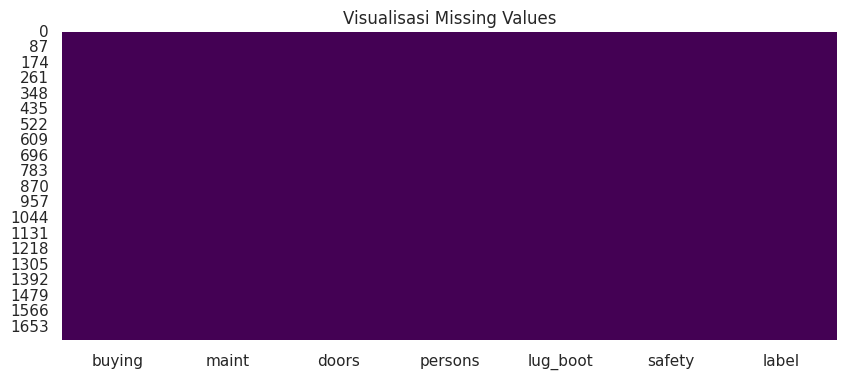

In [143]:
# Visualisasi missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()


In [144]:
# 5. Statistik Deskriptif
print("\n📊 Statistik Deskriptif")
print(df.describe(include='all'))


📊 Statistik Deskriptif
       buying  maint doors persons lug_boot safety  label
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210



📈 Distribusi Kelas pada Kolom 'label':
label
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


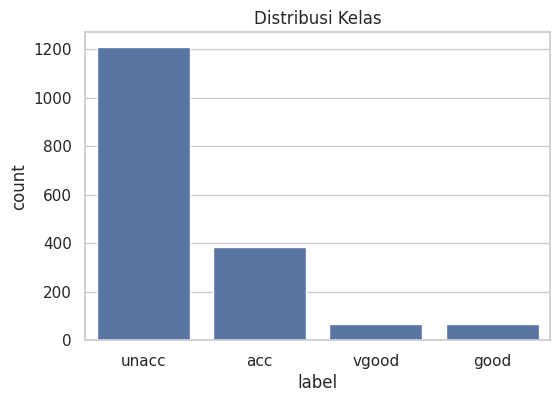

In [145]:
# 6. Distribusi Target (Jika Ada Kolom Target)
# Misal: kolom target adalah 'label'
if 'label' in df.columns:
    print("\n📈 Distribusi Kelas pada Kolom 'label':")
    print(df['label'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='label')
    plt.title("Distribusi Kelas")
    plt.show()
elif 'quality' in df.columns: # Assuming 'quality' might be the target in this dataset
    print("\n📈 Distribusi Kelas pada Kolom 'quality':")
    print(df['quality'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='quality')
    plt.title("Distribusi Kelas ('quality')")
    plt.show()


<ipython-input-149-1823863752>:21: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Atur agar elemen tidak tumpang tindih
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


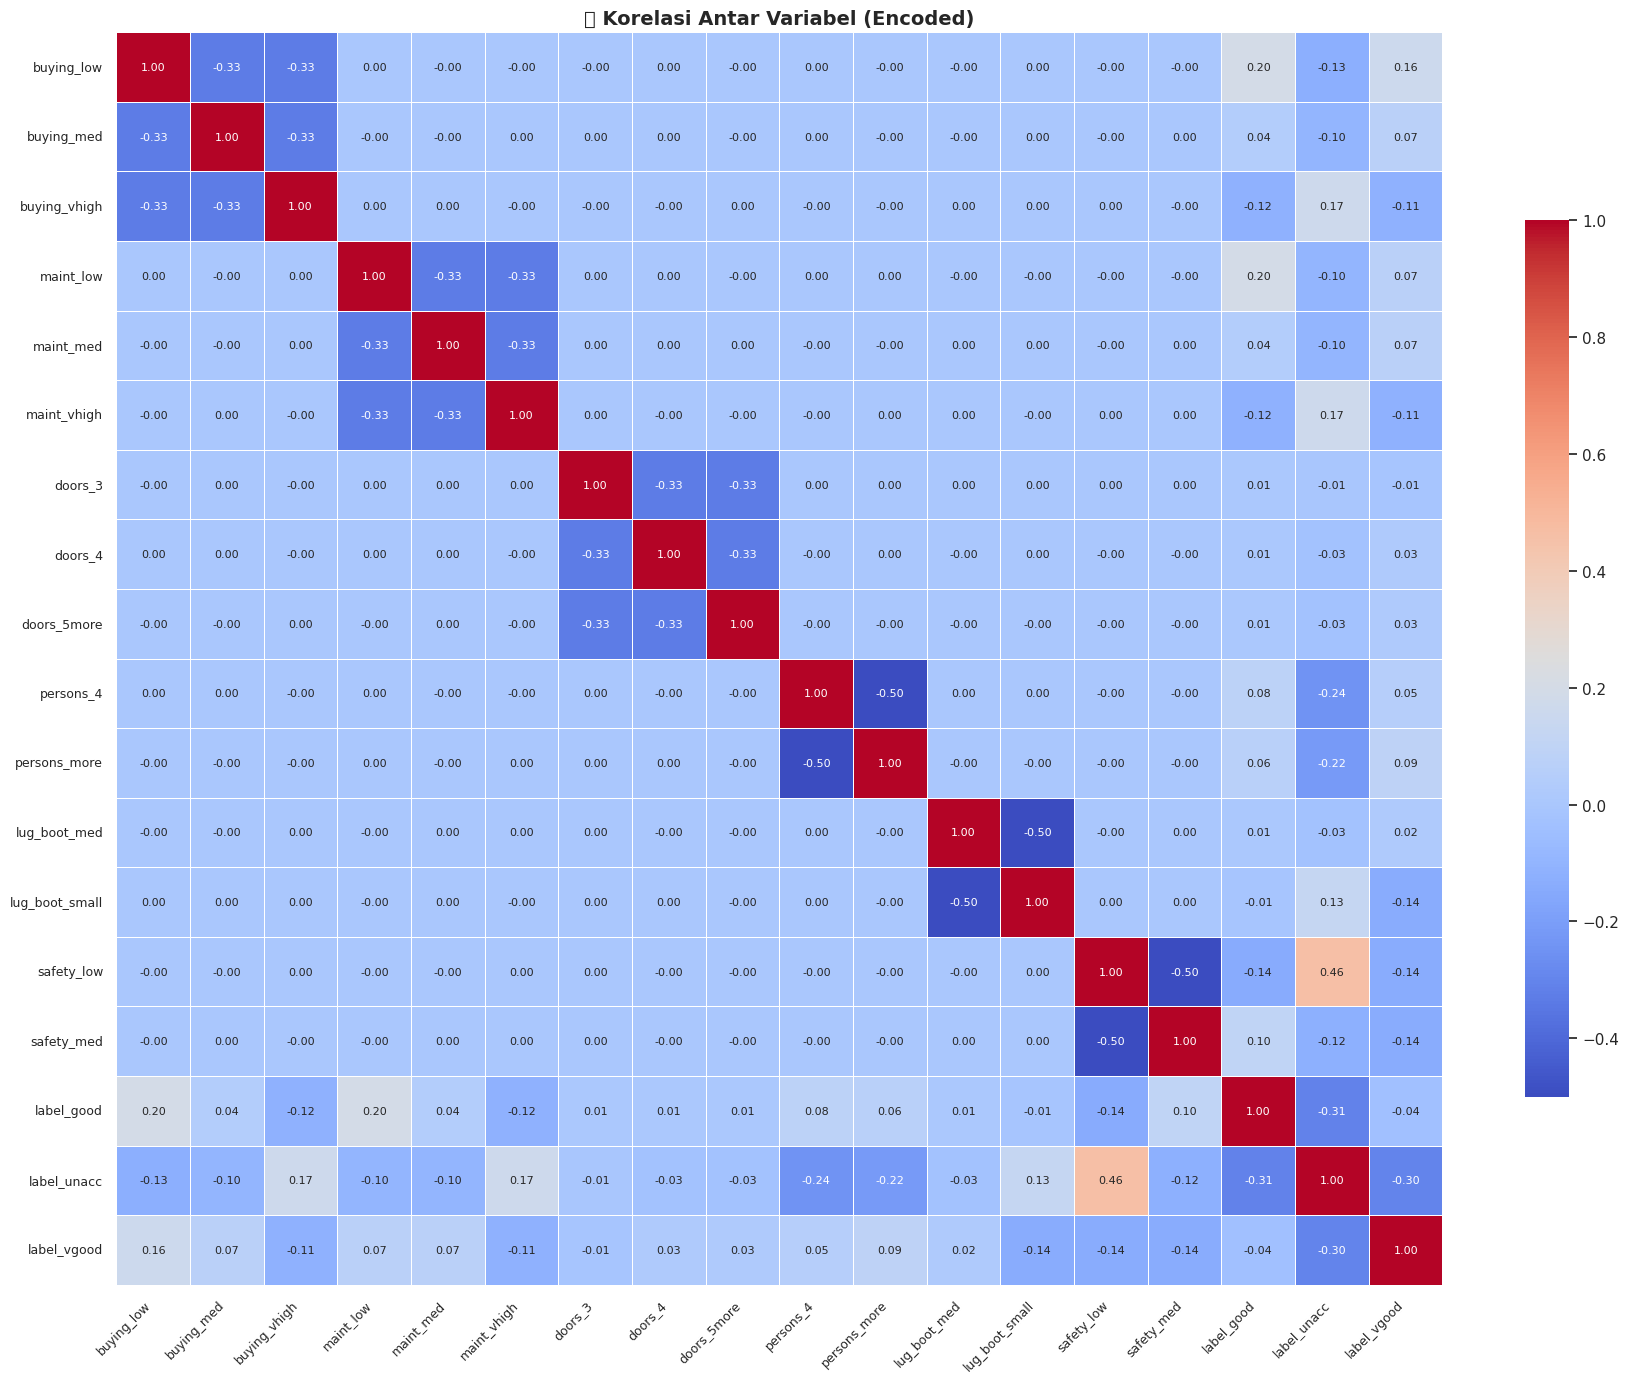

In [149]:
# Encode kolom kategorikal agar bisa dihitung korelasinya
df_encoded = pd.get_dummies(df, drop_first=True)

# Buat heatmap korelasi yang lebih rapi dan terbaca
plt.figure(figsize=(18, 14))  # Ukuran diperbesar
correlation_matrix = df_encoded.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                  # Format angka: 2 angka di belakang koma
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},   # Perkecil color bar
    annot_kws={"size": 8}       # Ukuran angka di sel
)

plt.xticks(rotation=45, ha='right', fontsize=9)  # Label kolom miring & kecil
plt.yticks(rotation=0, fontsize=9)               # Label baris tetap
plt.title("🔗 Korelasi Antar Variabel (Encoded)", fontsize=14, fontweight='bold')
plt.tight_layout()  # Atur agar elemen tidak tumpang tindih
plt.show()



In [ ]:
# Konversi kolom kategorikal ke numerik (dummy encoding)
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

# Ambil kolom numerik dari hasil encoding
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

print(f"Found {len(numeric_cols)} numeric columns: {numeric_cols[:5]}...")

if numeric_cols:
    cols_to_plot = numeric_cols[:20] if len(numeric_cols) > 20 else numeric_cols

    # 1. HISTOGRAM (kode asli Anda)
    df_encoded[cols_to_plot].hist(bins=20, figsize=(20, 15), color='skyblue', alpha=0.7, edgecolor='black')
    plt.suptitle("Histogram Setiap Variabel Numerik (Encoded)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # 2. BOXPLOT (tambahan baru)
    n_cols = len(cols_to_plot)
    n_rows = (n_cols + 3) // 4  # 4 columns per row

    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    if n_rows == 1 and len(cols_to_plot) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        sns.boxplot(y=df_encoded[col], color='lightcoral', ax=axes[i])
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle("Boxplot Setiap Variabel Numerik (Encoded)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # 3. INDIVIDUAL HISTOGRAM + BOXPLOT FILES (kode asli Anda yang diperbaiki)
    for col in cols_to_plot:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

        # Histogram
        sns.histplot(df_encoded[col], kde=True, color='skyblue', alpha=0.7, ax=ax1)
        ax1.set_title(f"Histogram - {col}")
        ax1.grid(True, alpha=0.3)

        # Boxplot
        sns.boxplot(x=df_encoded[col], color='lightcoral', ax=ax2)
        ax2.set_title(f"Boxplot - {col}")
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(f"hist_box_{col}.png", dpi=300, bbox_inches='tight')
        plt.close()

    print("Histogram dan boxplot telah disimpan!")

else:
    print("No numeric columns found for plotting!")


In [ ]:
# 9. Pairplot (opsional, untuk jumlah fitur kecil)
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.show()

In [ ]:
# 10. Simpan Laporan EDA
# Ganti nama eda_summary.csv menjadi nim_nama.csv
df.describe().to_csv("eda_summary.csv")
print("✅ EDA selesai. Ringkasan disimpan di file 'eda_summary.csv'.")

### 📊 Visualisasi Distribusi Kolom Kategorikal
Menampilkan distribusi kategori dari setiap kolom bertipe `object` untuk memahami sebaran data kategorikal.

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    if df[col].nunique() < 20:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribusi kategori: {col}')
        plt.xticks(rotation=45)
        plt.show()

### 🔗 Visualisasi Korelasi Variabel Numerik
Membuat heatmap korelasi hanya jika terdapat lebih dari satu kolom numerik.

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("🔗 Korelasi Antar Variabel Numerik")
    plt.show()
else:
    print("🚫 Tidak cukup kolom numerik untuk korelasi.")

### 🧩 Distribusi Variabel Numerik berdasarkan Target
Membandingkan distribusi fitur numerik berdasarkan kelas target (jika tersedia).

In [ ]:
target_col = 'y' if 'y' in df.columns else None

if target_col:
    for col in numeric_cols:
        plt.figure()
        sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=30)
        plt.title(f'Distribusi {col} berdasarkan {target_col}')
        plt.show()

### 🔍 Perbandingan Proporsi Kategori terhadap Target
Mengamati hubungan antara fitur kategorikal dengan variabel target.

In [ ]:
if target_col:
    for col in categorical_cols:
        if df[col].nunique() < 10:
            ct = pd.crosstab(df[col], df[target_col], normalize='index')
            ct.plot(kind='bar', stacked=True)
            plt.title(f'Distribusi {target_col} berdasarkan {col}')
            plt.ylabel('Proporsi')
            plt.xticks(rotation=45)
            plt.show()

### 🧪 Analisis Multikolinearitas dengan VIF
Menggunakan Variance Inflation Factor (VIF) untuk mendeteksi kolinearitas antar fitur numerik.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

if len(numeric_df.columns) > 1:
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
    print("\n📌 Variance Inflation Factor (VIF):\n")
    print(vif_data)

### 💾 Menyimpan Visualisasi Histogram sebagai File
Langkah opsional untuk dokumentasi laporan EDA.

In [ ]:
# Visualisasi histogram tiap kolom numerik dan simpan ke file PNG
for col in numeric_cols:
    plt.figure()
    sns.histplot(df_encoded[col], kde=True)  # Changed df to df_encoded
    plt.title(f"Distribusi {col}")
    plt.savefig(f"hist_{col}.png")
    plt.close()